### Lending Club Data Analysis
Team: Neha Aggarwal and Harry Beddo

### Project Motivation
Lending Club is a peer-to-peer lending company. The peer-to-peer lending industry is connecting borrowers with lenders in a highly efficient manner with very low intermediation costs. However, the industry still face defaults by borrowers and it becomes very important for the company to understand the profile of a defaulter on a large scale. Besides, while searching for a potential investment, a lender should be able to explore his options in terms of ROI alongwith reducing the risk in the investment. These scenarios motivated us to dig deep into the actual lending data and explore the patterns in the borrower activity based on his / her credit history and employment information.

### Project Goals
Through this exploration, we aim to work on the following analyses-
1. Understanding the profile of a average borrower as well as understanding the differences in the profiles of borrowers based on their loan status. This analysis is done on various features - annual income, employment, credit history, location, loan amount and interest rate etc.
2. Understanding the Average APR (basically, ROI) for various investments segmented by different parameters to see if we could find any visible patterns for low risk, high return potential investments for the lenders

### Dataset Description
The data-set contains complete loan information for all the loans issued through Lending club from 2007-2015. It contains around 890 thousand observations across 75 variables. The data could be broadly divided into two sections: 
1. the borrower data, and 
2. the loan amount statistics. 
Each row contains borrower's information as well the details for a loan amount issued such as the terms for loan amount, interest rate, borrower credit history, borrower employment data etc.

### Data Analysis

In [1]:
## importing the required libraries
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import matplotlib.patches as mpatches

In [2]:
## loaded the data as a pandas dataframe
loan_data = pd.read_csv("loan.csv", low_memory = False)

#### Data engineering part to divide the data into some categories for conducting the analyses

In [3]:
## function to make loan status consistent and make some defined categories
def f(row):
    if (row['loan_status'] == "Fully Paid") | (row['loan_status'] == "Does not meet the credit policy. Status:Fully Paid"):
        val = "Fully Paid"
        
    elif (row['loan_status'] == "Charged Off") | (row['loan_status'] == "Does not meet the credit policy. Status:Charged Off"):  
        val = "Charged Off"
        
    elif row['loan_status'] == "Current":
        val = "Current"
        
    elif (row['loan_status'] == "Late (31-120 days)") | (row['loan_status'] == "Late (16-30 days)") :
        val = "Late"
        
    elif row['loan_status'] == "In Grace Period":
        val = "In Grace Period"
        
    elif row['loan_status'] == "Issued":
        val = "Issued"
        
    elif row['loan_status'] == "Default":
        val = "Default"
        
    return val

loan_data['Loan_Status'] = loan_data.apply(f, axis=1)

In [4]:
## function to divide loan amount into loan amount bins
def loan_amount(row):
    if (row['loan_amnt'] <= 5000):
        value = "< 5,000 USD"
        
    elif (row['loan_amnt'] > 5000 and row['loan_amnt'] <= 20000):  
        value = "5,000 USD - 20,000 USD"
        
    elif (row['loan_amnt'] > 20000):
        value = "> 20,000 USD"
        
    return value

loan_data['loan_amount_categories'] = loan_data.apply(loan_amount, axis=1)

In [5]:
## function to define annual income into income bins
def annual_inc(row):
    
    if (row['annual_inc'] <= 20000):
        cat = "< 20,000 USD"
        
    elif (row['annual_inc'] > 20000 and row['annual_inc'] <= 50000):
        cat = "20,000 USD - 50,000 USD"
    
    elif (row['annual_inc'] > 50000 and row['annual_inc'] <= 100000):
        cat = "50,000 USD - 100,000 USD"
        
    elif (row['annual_inc'] > 100000):
        cat = "> 100,000 USD"
        
    return cat

loan_data['annual_inc'] = loan_data['annual_inc'].fillna(0)
loan_data['income_categories'] = loan_data.apply(annual_inc, axis=1)

In [6]:
## function to define the employment length
def f(row):
    if (row['emp_length'] == "< 1 year") | (row['emp_length'] == "1 year"):
        val = 1 
    elif (row['emp_length'] == "2 years"):  
        val = 2
        
    elif (row['emp_length'] == "3 years"):  
        val = 3
    elif (row['emp_length'] == "4 years"):  
        val = 4
    elif (row['emp_length'] == "5 years"):  
        val = 5
    elif (row['emp_length'] == "6 years"):  
        val = 6
    elif (row['emp_length'] == "7 years"):  
        val = 7
    elif (row['emp_length'] == "8 years"):  
        val = 8
    elif (row['emp_length'] == "9 years"):  
        val = 9
    elif (row['emp_length'] == "10+ years"):  
        val = '>10'
    elif (row['emp_length'] == "n/a"):
        val = 0
    
        
    return val
loan_data['emp_len'] = loan_data.apply(f, axis=1)

### Exploratory Data Aanalysis

First of all, we tried to understand the average profile of a borrower based on various parameters given for the borrower such as employment length, annual income, home ownership status, loan grade, location in USA

### 1. Employment Length
From the employment history, we found out that the most of the borrowers have 10+ years of employment. This was something unexpected. We thought that the borrowers would be more in the early years of employment

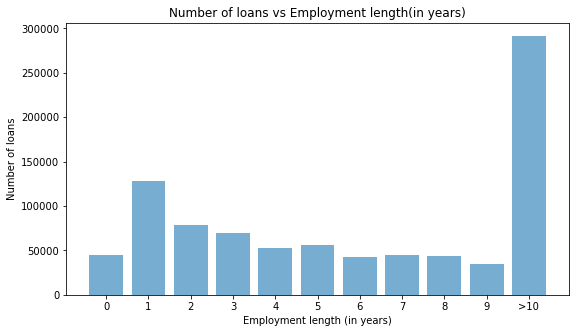

In [7]:
plt.figure(figsize=(9,5))
## counting the number of loans for various lengths of employment
loan_exp = pd.DataFrame({'Number of loans' : loan_data.groupby( ['emp_len'] ).size()}).reset_index()

ypos = np.arange(len(loan_exp['emp_len']))

## plotting the number of borrowers against employment length
plt.bar(ypos, loan_exp['Number of loans'], align='center', alpha=0.6)

plt.ylabel('Number of loans')
plt.xlabel('Employment length (in years)')
plt.xticks(ypos, loan_exp['emp_len'])
plt.title("Number of loans vs Employment length(in years)")
plt.show()

### Home Ownership with employment history
For the same graph, we dug deep into the home ownerwhip status of the borrower and found out that most of the borrowers have their homes mortgaged or rented. A very few percentage of the borrowers have their own homes. 

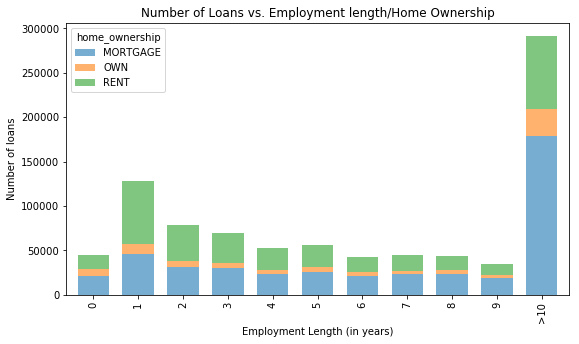

In [8]:
## Grouping the data by employment length and home ownership
employment_home = loan_data.groupby(['emp_len', 'home_ownership'])['emp_len'].count().unstack('home_ownership').fillna(0)

## plotting the data for different ownership status
employment_home[['MORTGAGE','OWN', 'RENT']].plot(kind='bar', stacked=True, align='center', alpha=0.6, width = 0.70, figsize=(9,5))
plt.title("Number of Loans vs. Employment length/Home Ownership")
plt.xlabel("Employment Length (in years)")
plt.ylabel("Number of loans")
plt.show()

### Home Ownership
Bar chart visualization for just the ownership status

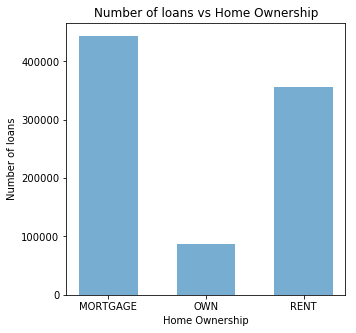

In [9]:
plt.figure(figsize=(5,5))
## counting the number of loans with different home ownership statuses
loan_home = pd.DataFrame({'Number of loans' : loan_data.groupby( ['home_ownership'] ).size()}).reset_index()

## used to remove any other invaluable home ownership statuses
value_list = ['MORTGAGE', 'OWN', 'RENT']
loan_home = loan_home[loan_home.home_ownership.isin(value_list)]

## plotting the number of borrowers for different home ownership statuses
ypos = np.arange(len(loan_home['home_ownership']))
plt.bar(ypos, loan_home['Number of loans'], align='center', alpha=0.6, width = 0.6)
plt.ylabel('Number of loans')
plt.xlabel('Home Ownership')
plt.xticks(ypos, loan_home['home_ownership'])
plt.title("Number of loans vs Home Ownership")
plt.show()

### Annual Income Distribution
Here, we tried to understand the annual income range for a typical borrower and found out that around 50% of the borrowers earn in the range from 50,000 USD - 100,000 USD. There were also significant number of borrowers in the 20,000 - 50,000 USD income range. This was quite uderstandable. 

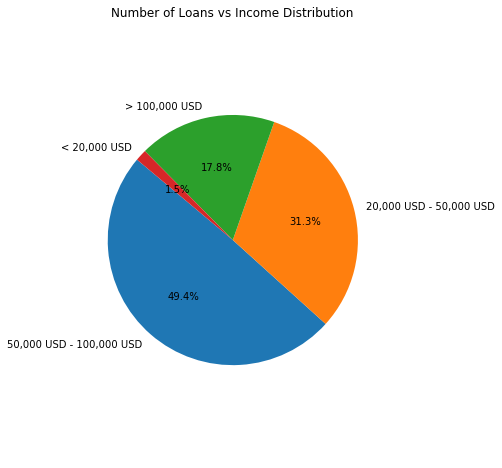

In [10]:
plt.figure(figsize=(11,8))
ax1 = plt.subplot(121, aspect='equal')

## counting the number of values in different income categories
income_cat_count = loan_data['income_categories'].value_counts()
income_cat = loan_data['income_categories'].value_counts().index.values

## plotting the pie chart 
plt.pie(income_cat_count, labels=income_cat, 
        autopct='%1.1f%%', startangle=140, radius = 0.5)
plt.title("Number of Loans vs Income Distribution")
plt.axis('equal')
plt.show()

### Number of Loans vs. Loan Grades
Loan grades are the categories assigned by the lending club based on the credit history of the borrowers. A borrower with grade as A is the least risky with the riskiness increasing as the grades increase from A to G. From this graph, we can see that most of the borrowers fall in the B or C category which are less risky grade categories

Note: This graph has been taken from the Tableau workbook

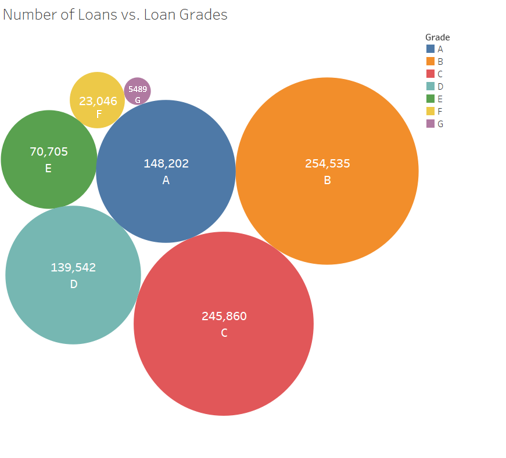

### Number of Loans vs. US States
We made this plot to understand the distribution of borrowers within US and found out that the borrowers mostly reside in CA, NY, FL, and TX which are also the most populous states of US

Note: this graph has been taken from the Tableau workbook

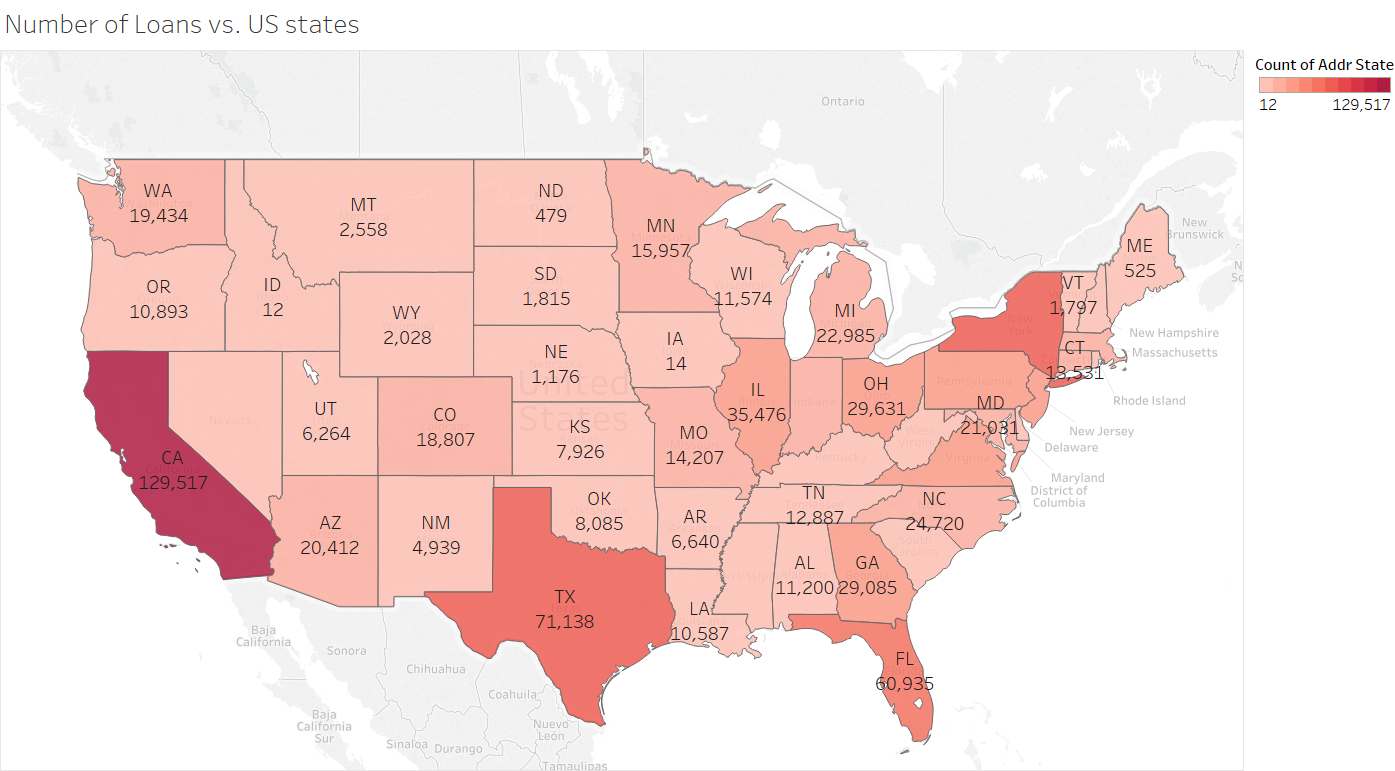

### Analysis of borrower profile based on the loan status of the borrower
Next, we wanted to understand that the difference in the borrower profile based on their loan status. We thought that this could be an interesting analysis to find if there is any difference in the defaulters. The differences could give an idea about how a default profile looks like.

Lending club has divided the loans broadly into two categories. 
#### For this analysis, we have used two different colours to show the two categories. Green colour is used to show the borrowers with timley loan repayments and Red colour is used to show the borrowers with late loan payments
### Timely loan repayments
1. Current: Loan is up to date on all outstanding payments. 
2. Fully paid: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.

### Late loan repayments
1. Grace Period: Loan is past due but within the 15-day grace period. 
2. Late (16-30): Loan has not been current for 16 to 30 days. Learn more about the tools LendingClub has to deal with delinquent borrowers.
3. Late (31-120): Loan has not been current for 31 to 120 days. Learn more about the tools LendingClub has to deal with delinquent borrowers. 
4. Default: Loan has not been current for 121 days or more. Learn more about the difference between “default” and “charge off”.
5. Charged Off: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance. Learn more about the difference between “default” and “charge off”.

### Mean Annual Income vs. Loan Status
First, we tried to understand if there is a difference in various borrowers profile based on the mean annual income of the borrower. We found out that the borrowers who have "Current" and "Fully Paid" loan status have slightly more mean income as compared to the borrowers in the other categories. This was quite expected. 

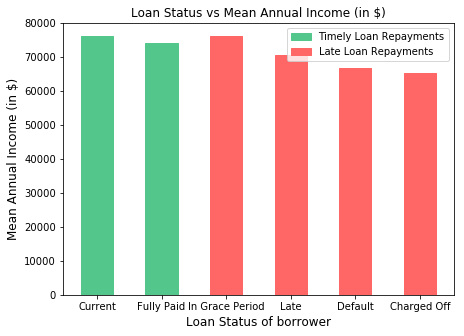

In [11]:
## Plotting the mean income vs the loan status

plt.figure(figsize=(7,5))

## Making a list of the loan status we wanted to consider
loan_status = ['Current', 'Fully Paid', 'In Grace Period', 'Late', 'Default', 'Charged Off']

## calculating the mean income by various loan statuses
mean_income = round(loan_data.groupby('Loan_Status').apply(lambda d: d['annual_inc'].mean()), 2)
mean_income = mean_income.drop("Issued")
mean_income_index = mean_income.index.values
mean_income_values = mean_income.values

y_pos = np.arange(len(mean_income_index))

## sorting the mean income based on the list "loan_status", so that we can differentiate the two different 
## types of loan repayments
mean_income2 = sorted(mean_income, key = lambda x: loan_status.index(mean_income[mean_income==x].index[0]))
mean_income2 = [round(x) for x in mean_income2]

barlist=plt.bar(y_pos, mean_income2, align='center', width = 0.50)
plt.xticks(y_pos, loan_status)

## setting the green and red colours based on the loan statuses
barlist[0].set_color('#53c68c')
barlist[1].set_color('#53c68c')
barlist[2].set_color('#ff6666')
barlist[3].set_color('#ff6666')
barlist[4].set_color('#ff6666')
barlist[5].set_color('#ff6666')

plt.xlabel("Loan Status of borrower", fontsize=12)
plt.ylabel("Mean Annual Income (in $)", fontsize=12)
plt.title("Loan Status vs Mean Annual Income (in $)")

## adding the legend for the loan repayments
red_box = mpatches.Patch(color='#ff6666', label='Late Loan Repayments')
green_box = mpatches.Patch(color='#53c68c', label='Timely Loan Repayments')
plt.legend(handles=[green_box,red_box])
plt.show()

### Loan Amount (in USD) vs. Loan Status
Then, we tried to understand if there is a difference in various borrowers profile based on the loan amount that they take. However, there was not much difference found. Only the borrowers with "fully-paid" loan status have slightly less loan amounts

In [12]:
## "Issued" loan status was removed since these were the loans just issued and were not of much value in the analyses
loan_data2 = loan_data[loan_data["Loan_Status"] != 'Issued']

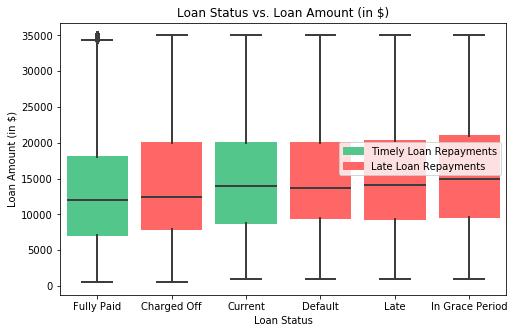

In [13]:
plt.figure(figsize=(8,5))

## Box plot for loan amount on loan status
ax = sns.boxplot(x="Loan_Status", y="loan_amnt", data=loan_data2, linewidth=2)

## setting the green and red colours based on the loan statuses
ax.artists[0].set_color('#53c68c')
ax.artists[1].set_color('#ff6666')
ax.artists[2].set_color('#53c68c')
ax.artists[3].set_color('#ff6666')
ax.artists[4].set_color('#ff6666')
ax.artists[5].set_color('#ff6666')


plt.xlabel("Loan Status")
plt.ylabel("Loan Amount (in $)")
plt.title("Loan Status vs. Loan Amount (in $)")

## adding the legend for the loan repayments
red_box = mpatches.Patch(color='#ff6666', label='Late Loan Repayments')
green_box = mpatches.Patch(color='#53c68c', label='Timely Loan Repayments')
plt.legend(handles=[green_box,red_box])
plt.show()

### Interest Rate (in %) vs. Loan Status
Here, we analysed the difference based on the interest rate for different loan statuses. We found out that the interest rates were particularly higher for the categories where loan repayments were late. This was something that we expected. Lending club would have analysed the profile of a borrower based on the loan repayments schedules and credit history and consequently kept the interest rate high for a particular borrower

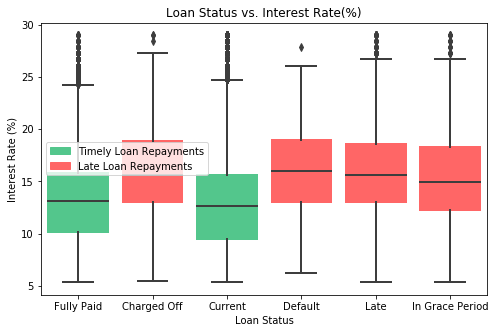

In [14]:
## plotting the interest rate of the borrower (a way to define a risky borrower) vs loan status
plt.figure(figsize=(8,5))

## Box plot for interest rate vs loan status
ax = sns.boxplot(x="Loan_Status", y="int_rate", data=loan_data2, linewidth=2)

## setting the green and red colours based on the loan statuses
ax.artists[0].set_color('#53c68c')
ax.artists[1].set_color('#ff6666')
ax.artists[2].set_color('#53c68c')
ax.artists[3].set_color('#ff6666')
ax.artists[4].set_color('#ff6666')
ax.artists[5].set_color('#ff6666')


plt.title("Loan Status vs. Interest Rate(%)")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate (%)")

## adding the legend for the loan repayments
red_box = mpatches.Patch(color='#ff6666', label='Late Loan Repayments')
green_box = mpatches.Patch(color='#53c68c', label='Timely Loan Repayments')
plt.legend(handles=[green_box,red_box])
plt.show()

### Purpose of loan vs. Loan Status
Here, we wanted to see if there are any differences based on the purpose of loan. Although, there were not much interesting trends here. We could see that most of the borrowers (irrespective of their loan status) take loans for the debt consolidation or credit card payments.

In [15]:
## for the analysis we took the percentage of borrowers falling in each of the "loan purpose" categories

## counting the number of loans grouped by purpose of loan
loan_purpose = pd.DataFrame({'count' : loan_data.groupby( ['Loan_Status', 'purpose'] ).size()}).reset_index()
status_purpose = loan_purpose.groupby(['Loan_Status', 'purpose']).agg({'count': 'sum'})
status = loan_purpose.groupby(['Loan_Status']).agg({'count': 'sum'})
## calculating the percentage and arranging in a dataframe
loan_df = round(status_purpose.div(status) * 100, 2)
loan_df2 = loan_df.pivot_table('count', ['Loan_Status'], 'purpose')
loan_df2 = loan_df2.fillna(0)

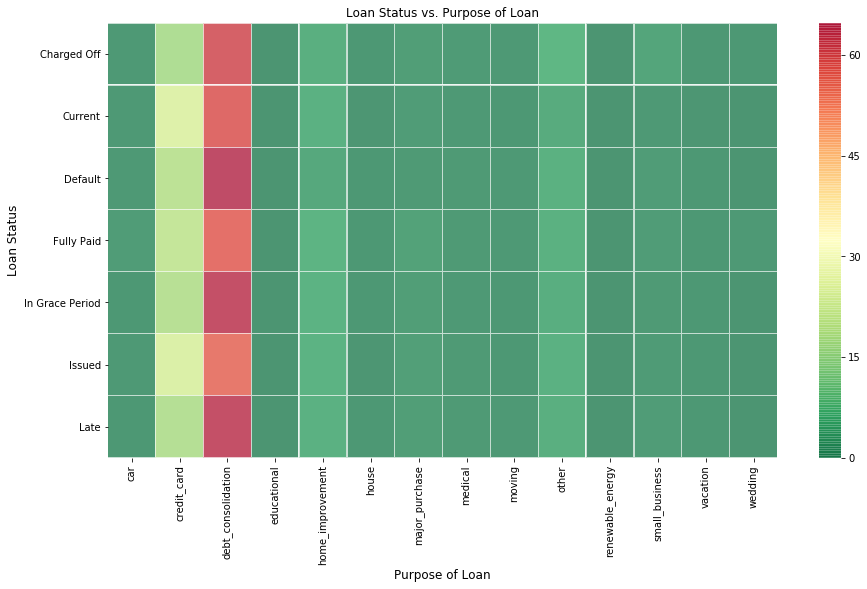

In [16]:
## Trying to understand the type of loans people usually take with different loan status

fig, ax = plt.subplots(figsize=(15,8))

## heatmap plot for "loan purpose" against loan status 
sns.heatmap(loan_df2, fmt = "", cmap = "RdYlGn_r", linewidths = 0.3, ax=ax, alpha=0.7)

plt.xlabel("Purpose of Loan", fontsize = 12)
plt.ylabel("Loan Status", fontsize = 12)
plt.title("Loan Status vs. Purpose of Loan")

plt.show()

### Home Ownership vs. Loan Status
Did similar analysis for the home ownership against loan status but did not find any interesting results. The results that we found were quite unexpected. Borrowers with loan status as "Fully paid" and "current" have more mortgaged houses as compared to other categories of borrowers. However, there was some understandable trend for the rented home ownership

In [17]:
## for the analysis we took the percentage of borrowers falling in each of the "home ownership" categories

## counting the number of loans grouped by home ownership
loan_house = pd.DataFrame({'count' : loan_data.groupby( ['Loan_Status', 'home_ownership'] ).size()}).reset_index()
status_house = loan_house.groupby(['Loan_Status', 'home_ownership']).agg({'count': 'sum'})
house = loan_house.groupby(['Loan_Status']).agg({'count': 'sum'})

## calculating the percentage and arranging in a dataframe
loan_df1 = round(status_house.div(house) * 100, 2)
loan_df3 = loan_df1.pivot_table('count', ['Loan_Status'], 'home_ownership')
loan_df3 = loan_df3.fillna(0)

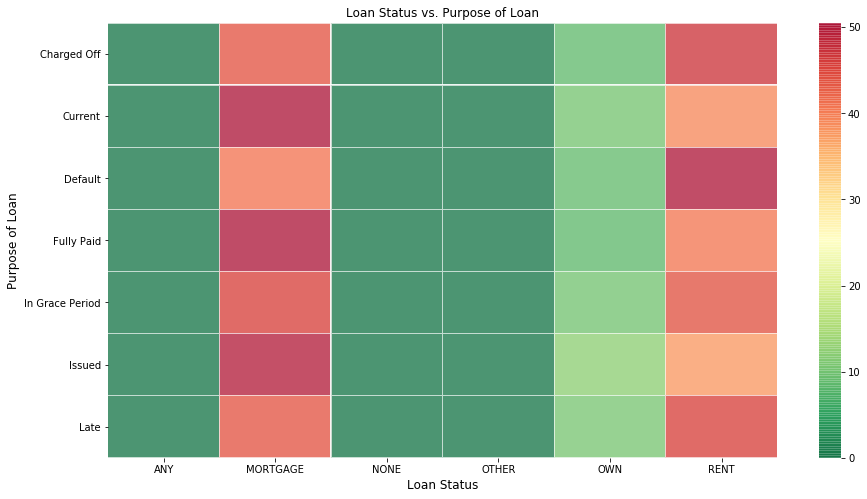

In [18]:
fig, ax = plt.subplots(figsize=(15,8))

## heatmap plot for "loan purpose" against loan status 
sns.heatmap(loan_df3, fmt = "", cmap = "RdYlGn_r", linewidths = 0.3, ax=ax, alpha=0.7)

plt.xlabel("Loan Status", fontsize = 12)
plt.ylabel("Purpose of Loan", fontsize = 12)
plt.title("Loan Status vs. Purpose of Loan")

plt.show()

### Analysis for Return on Investment

In [19]:
# Remove all the investments that have not beeen funded
loan_data = loan_data[loan_data.funded_amnt_inv != 0]

In [20]:
## function to find the total number of months between first and last payments
from datetime import datetime
import math
# d1 and d2 are strings like "Jan-2001"
def diff_month(d1,d2):
    # if d1 is empty, then the loan has just begun
    if not isinstance(d1, str):
        return 0
    else:
        date1 = datetime.strptime(d1, '%b-%Y')
        date2 = datetime.strptime(d2, '%b-%Y')
        return (date1.year - date2.year) * 12 + (date1.month - date2.month) + 1
    
## function to calculate the APR for a given loan
def calc_apr(total_roi, months):
    if months == 0:
        return 0
    else:
        return total_roi**(1/(months/12))

### Calculation of APR and ROI

Given the functions above, the following code will calculate the necessary values to find the Number of months payed, Total ROI, APR, and weighted APR

In [21]:
loan_data['diff_months'] = loan_data.apply(lambda x: diff_month(x['last_pymnt_d'],x['issue_d']), axis=1)
loan_data['total_roi'] = loan_data.apply(lambda x: x['total_pymnt_inv']/x['funded_amnt_inv'], axis=1)
loan_data['apr'] = loan_data.apply(lambda x: calc_apr(x['total_roi'],x['diff_months']), axis=1)
loan_data['apr*total_funded'] = loan_data.apply(lambda x: x['apr']*x['funded_amnt_inv'], axis=1)

The following code snippets divide the data frame into different types of loan status: Fully Paid, Charged Off, Default.  These three loan statuses comprise the finished loans.  

In [22]:
finished_loans = loan_data[(loan_data['loan_status'] == 'Fully Paid') | (loan_data['loan_status'] == 'Charged Off')  | (loan_data['loan_status'] == 'Default')]

In [23]:
## function to calculate the average APR of a given dataframe
def calc_Average_APR(df):
    if len(df) == 0: return 0
    total_inv = df['funded_amnt_inv'].sum()
    apr_total_weighted = df['apr*total_funded'].sum()
    return apr_total_weighted/total_inv

### What is the average APR of the finished loans?

In [24]:
print(calc_Average_APR(finished_loans))

0.9658413467916871


Given all of the finished loans in the dataset, we have an average APR of -3.43%.  This means that we would be losing 3.43% of our investment every year on average if we invested in all of the finished loans in the dataset.

### What is the Average APR of Fully Paid vs. Charged Off vs. Default loans?
From the given analysis, we can see that we would have a 9.7% average APR if we invested in every single loan that has been fully paid.  On the other hand, we would have a -57% average APR if we only invested in Charged Off loans and a -60% average APR if we invested in only Defaulted loans.  

In [25]:
## calculating the ROI for the given loan status - Fully paid, charged off and default
loan_status = ['Fully Paid','Charged Off','Default']
loan_status_ROI = [calc_Average_APR(finished_loans[finished_loans['loan_status'] == x]) for x in loan_status]

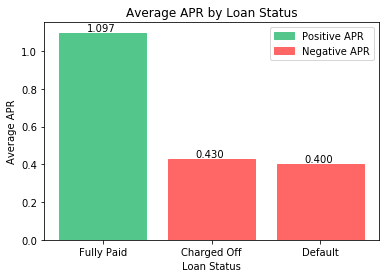

In [26]:
y_pos = np.arange(len(loan_status))

## bar plot to see the difference in APR for various loan statuses
bar_loan_status = plt.bar(y_pos,loan_status_ROI)
plt.xticks(y_pos,loan_status)

## setting the green and red colours based on the APR
bar_loan_status[0].set_color('#53c68c')
bar_loan_status[1].set_color('#ff6666')
bar_loan_status[2].set_color('#ff6666')

plt.xlabel('Loan Status')
plt.ylabel('Average APR')

for i in range(len(loan_status)):
    plt.annotate('{:.3f}'.format(loan_status_ROI[i]),(y_pos[i]-0.15,loan_status_ROI[i]+.01))
    
plt.title('Average APR by Loan Status')

## adding the legend for the APR
red_box = mpatches.Patch(color='#ff6666', label='Negative APR')
green_box = mpatches.Patch(color='#53c68c', label='Positive APR')
plt.legend(handles=[green_box,red_box])

plt.show()

### Does the amount of the loan affect the average APR?
From this analysis, we see that there is a slight decrease in average APR as the loan amount increases.  For every single bin, the average APR is negative.  

In [27]:
## calculating the APR value for the loan amount taken by the borrower
loan_amount_bins = ['< 5,000 USD','5,000 USD - 20,000 USD','> 20,000 USD']
loan_amount_ROI = [calc_Average_APR(finished_loans[finished_loans['loan_amount_categories'] == x]) for x in loan_amount_bins]

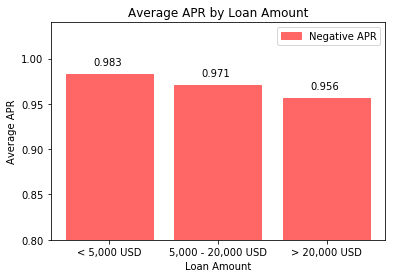

In [28]:
y_pos = np.arange(len(loan_amount_bins))

## bar plot for the APR vs loan amount taken
bar_loan_amount = plt.bar(y_pos,loan_amount_ROI)
plt.xticks(y_pos,['< 5,000 USD','5,000 - 20,000 USD','> 20,000 USD'],rotation=0)

## setting the green and red colours based on the APR
bar_loan_amount[0].set_color('#ff6666')
bar_loan_amount[1].set_color('#ff6666')
bar_loan_amount[2].set_color('#ff6666')

plt.xlabel('Loan Amount')
plt.ylabel('Average APR')
plt.ylim([0.8,1.04])

for i in range(len(loan_amount_bins)):
    plt.annotate('{:.3f}'.format(loan_amount_ROI[i]),(y_pos[i]-0.15,loan_amount_ROI[i]+.01),rotation=0)
    
plt.title('Average APR by Loan Amount')

## adding the legend for the APR
legend_dict = {'Positive APR': 'Green', 'Negative APR': 'Red'}
red_box = mpatches.Patch(color='#ff6666', label='Negative APR')
plt.legend(handles=[red_box])

plt.show()

### How does the average APR change when investing in people with different credit grades?
From this analysis, we can see that the average APR decreases as the credit grade decreases.  Only those with credit grades of 'A' and 'B' have a positive average APR.  This seems to go against our initial inclination.  We thought that the average APR would increase as the credit grade decrease because the interest rates on loans increase as the credit grades decrease.  However, the higher occurrence of Defaulted and Charged Off loans account for the decrease in average APR.

In [29]:
## calculating the APR based on the loan grades value
Grades = ['A','B','C','D','E','F','G']
Grades_ROI = [calc_Average_APR(finished_loans[finished_loans['grade'] == x]) for x in Grades]

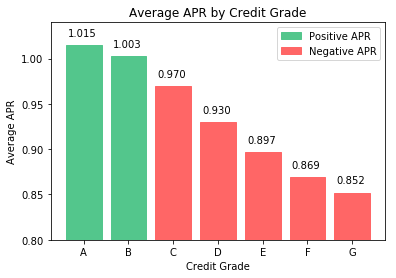

In [30]:
y_pos = np.arange(len(Grades))

## bar plot for the loan grades against APR value
bar_grade = plt.bar(y_pos,Grades_ROI)
plt.xticks(y_pos,Grades)

## setting the green and red colours based on the APR
bar_grade[0].set_color('#53c68c')
bar_grade[1].set_color('#53c68c')
bar_grade[2].set_color('#ff6666')
bar_grade[3].set_color('#ff6666')
bar_grade[4].set_color('#ff6666')
bar_grade[5].set_color('#ff6666')
bar_grade[6].set_color('#ff6666')

plt.xlabel('Credit Grade')
plt.ylabel('Average APR')
plt.ylim([0.8,1.04])

for i in range(len(Grades)):
    plt.annotate('{:.3f}'.format(Grades_ROI[i]),(y_pos[i]-0.35,Grades_ROI[i]+.01))
plt.title('Average APR by Credit Grade')

## adding the legend for the APR
red_box = mpatches.Patch(color='#ff6666', label='Negative APR')
green_box = mpatches.Patch(color='#53c68c', label='Positive APR')
plt.legend(handles=[green_box,red_box])

plt.show()

### How does the purpose of the loan affect the average APR?
We have listed the purpose of the loan in decreasing order by average APR.  Loans for weddings yielded the only positive average APR at a low 0.1%.  Most of the other loans were in the -10% - 0% Average APR range.  Small Business loans ranked last on the list at a -10.8% average APR. 

In [31]:
uniq_purpose = loan_data['purpose'].unique()

## calculating the ROI by purpose of loan
ROI_by_purpose = [calc_Average_APR(finished_loans[finished_loans['purpose'] == x]) for x in uniq_purpose]
purpose_dict={}
new_dict={}

## saving the values in a dictionary
for x,y in zip(uniq_purpose,ROI_by_purpose):
    purpose_dict[x] = y
    
for w in sorted(purpose_dict,key=purpose_dict.get, reverse=True):
    new_dict[w] = purpose_dict[w]

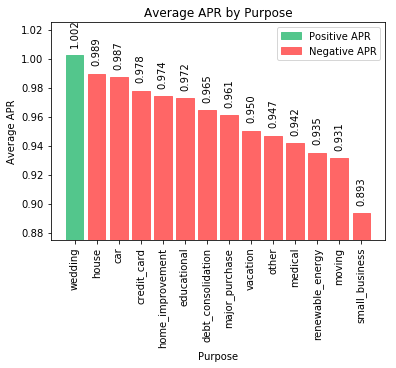

In [32]:
y_pos = np.arange(len(new_dict.keys()))

## bar plot for the loan purpose against APR value
bar_purpose = plt.bar(y_pos,new_dict.values())
plt.xticks(y_pos,new_dict.keys(),rotation=90)

## setting the green and red colours based on the APR
bar_purpose[0].set_color('#53c68c')
bar_purpose[1].set_color('#ff6666')
bar_purpose[2].set_color('#ff6666')
bar_purpose[3].set_color('#ff6666')
bar_purpose[4].set_color('#ff6666')
bar_purpose[5].set_color('#ff6666')
bar_purpose[6].set_color('#ff6666')
bar_purpose[7].set_color('#ff6666')
bar_purpose[8].set_color('#ff6666')
bar_purpose[9].set_color('#ff6666')
bar_purpose[10].set_color('#ff6666')
bar_purpose[11].set_color('#ff6666')
bar_purpose[12].set_color('#ff6666')
bar_purpose[13].set_color('#ff6666')


plt.xlabel('Purpose')
plt.ylabel('Average APR')
plt.ylim([0.875,1.025])

count=0
for i in new_dict.keys():
    plt.annotate('{:.3f}'.format(new_dict[i]),(y_pos[count]-0.225,new_dict[i]+.02),rotation=90)
    count=count+1
    
plt.title('Average APR by Purpose')

## adding the legend for the APR
red_box = mpatches.Patch(color='#ff6666', label='Negative APR')
green_box = mpatches.Patch(color='#53c68c', label='Positive APR')
plt.legend(handles=[green_box,red_box])

plt.show()